### Image classication of CIFAR10 dataset using CNN.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.utils import np_utils
import matplotlib.pyplot as plt


In [2]:
seed = 20

In [3]:
# importing the dataset.

from keras.datasets import cifar10


In [4]:
# Loading the dataset.

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
#Verifying the train data.
print(X_train[10])

[[[53 65 53]
  [54 63 52]
  [56 60 50]
  ...
  [47 51 50]
  [41 45 44]
  [24 28 27]]

 [[46 59 41]
  [53 62 45]
  [54 59 44]
  ...
  [42 46 45]
  [39 43 42]
  [28 32 31]]

 [[45 59 38]
  [50 60 41]
  [46 52 34]
  ...
  [38 42 41]
  [36 40 39]
  [29 33 32]]

 ...

 [[71 83 66]
  [74 83 66]
  [80 85 67]
  ...
  [51 54 33]
  [46 49 34]
  [49 50 41]]

 [[75 82 67]
  [79 85 69]
  [81 85 67]
  ...
  [61 65 41]
  [64 67 48]
  [48 50 41]]

 [[85 83 71]
  [85 84 71]
  [86 86 70]
  ...
  [61 65 39]
  [64 67 46]
  [49 50 41]]]


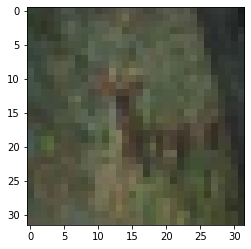

In [6]:
plt.imshow(X_train[10])

In [7]:
# Normalzing the inputs.

X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# One hot encoding of the output.

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [9]:
# Designing the model.

model = Sequential()

In [10]:
# Defining the Convolution Layer.

model.add(Conv2D(32,(3,3), input_shape = X_train.shape[1:], padding = "same"))
model.add(Activation("relu"))

In [11]:
# Dropout Layer.

model.add(Dropout(0.2))

In [12]:
# Batch Normalization.

model.add(BatchNormalization())

In [13]:
# Convolution Layer 2.

model.add(Conv2D(64,(3,3), input_shape = X_train.shape[1:], padding = "same"))
model.add(Activation("relu"))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


In [15]:
model.add(Conv2D(64,(3,3), input_shape = X_train.shape[1:], padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())



In [16]:
model.add(Conv2D(128,(3,3), input_shape = X_train.shape[1:], padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [17]:
model.add(Flatten())
model.add(Dropout(0.2))

In [18]:
model.add(Dense(256, kernel_constraint=max_norm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, kernel_constraint=max_norm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [19]:
model.add(Dense(class_num))
model.add(Activation('softmax'))


In [20]:
# Number of epochs and optimizer (Dependable).

epochs = 25
optimizer ='adam'

In [21]:
# Compiling the model.

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                        

In [23]:
np.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=epochs, batch_size=64)

Epoch 1/25
782/782 [==============================] - 180s 227ms/step - loss: 1.6164 - accuracy: 0.4244 - val_loss: 1.5886 - val_accuracy: 0.4378
Epoch 2/25
782/782 [==============================] - 185s 236ms/step - loss: 1.1420 - accuracy: 0.5896 - val_loss: 0.9701 - val_accuracy: 0.6549
Epoch 3/25
782/782 [==============================] - 196s 250ms/step - loss: 0.9444 - accuracy: 0.6660 - val_loss: 0.9592 - val_accuracy: 0.6671
Epoch 4/25
782/782 [==============================] - 172s 220ms/step - loss: 0.8432 - accuracy: 0.7042 - val_loss: 0.7326 - val_accuracy: 0.7465
Epoch 5/25
782/782 [==============================] - 182s 232ms/step - loss: 0.7766 - accuracy: 0.7278 - val_loss: 0.8431 - val_accuracy: 0.7093
Epoch 6/25
782/782 [==============================] - 187s 239ms/step - loss: 0.7172 - accuracy: 0.7499 - val_loss: 0.6198 - val_accuracy: 0.7842
Epoch 7/25
782/782 [==============================] - 198s 253ms/step - loss: 0.6786 - accuracy: 0.7638 - val_loss: 0.6420 -

In [24]:
# Evaluating the Model.

Model_Score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy of the model is %.2f%%" % (Model_Score[1]*100))

Accuracy of the model is 83.06%
